In [13]:

from matplotlib import pyplot as plot
import numpy as np
from scipy.spatial import distance
from sklearn.metrics import euclidean_distances
import pandas as pd
import random as rn
%matplotlib inline

In [2]:
gridify_digit = lambda df, index: np.split(np.asarray(df.ix[index, 1:]), 28)
vectorize_digit = lambda df, index: np.asarray(df.ix[index, 1:])

In [3]:
def one_of_each_digit(df, out_transx=gridify_digit):
    """
    Randomly picks one of each digit, generates a grid of
    it's pixels and returns a map from digit to pixels.

    :param df: a dataframe containting the full dataset
    :param out_transx: formats the pixels in the resultant
    map. Should be a function: (dataframe,index) → numpy
    array. By default this is `gridify_digits`

    :return: a map containing the digits 0-9 as the keys and
    a values as a tuple: (the pixels, the `id` the
    image from the dataset; i.e. 1 - 42000))
    """
    digits = dict(map(lambda i: (i, None), range(0, 10)))

    while not all(digits.values()):

        idx = rn.randrange(TRAINING_SIZE)
        digit = df.ix[idx, 0]

        if not digits[digit]:
            digits.update({digit: (out_transx(df, idx), idx)})

    return digits


In [4]:
def plot_one_vec_of_each_digit(df):
    random_digits = one_of_each_digit(df, vectorize_digit)

    fig = plot.figure()
    fig.suptitle("Vector of Each Digit, Randomly Selected")

    data = np.asarray(list(map(lambda t: t[0], random_digits.values())))

    plot.imshow(data, cmap="gray_r", aspect=20)
    plot.yticks(range(0, 10, 1))
    plot.show()

In [10]:
def display_digit(p, grid):
    p.imshow(grid, cmap="gray_r")

    p.tick_params(
        axis='y',
        which='both',
        left='off',
        right='off',
        labelleft='off',
        labelright='off')

    p.tick_params(
        axis='x',
        which='both',
        top='off',
        bottom='off',
        labeltop='off',
        labelbottom='off')

In [17]:
df0 = pd.read_csv("./kaggle_mnist_dataset/train.csv")
TRAINING_SIZE = 42000

/home/thomas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


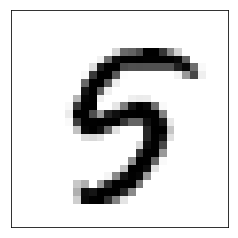

In [14]:
display_digit(plot, gridify_digit(df0, 8))

/home/thomas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


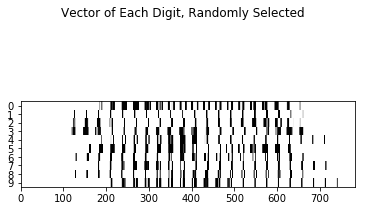

In [18]:
def plot_one_vec_of_each_digit(df):
    random_digits = one_of_each_digit(df, vectorize_digit)

    fig = plot.figure()
    fig.suptitle("Vector of Each Digit, Randomly Selected")

    data = np.asarray(list(map(lambda t: t[0], random_digits.values())))

    plot.imshow(data, cmap="gray_r", aspect=20)
    plot.yticks(range(0, 10, 1))
    plot.show()

plot_one_vec_of_each_digit(df0)

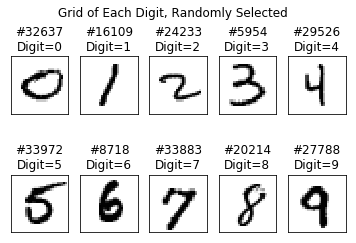

In [19]:
def save_one_grid_of_each_digit(df):
    random_digits = one_of_each_digit(df)

    fig = plot.figure()
    fig.suptitle("Grid of Each Digit, Randomly Selected")

    for d in random_digits:
        p = fig.add_subplot(2, 5, d + 1)
        display_digit(p, random_digits[d][0])
        p.title.set_text("#%d\nDigit=%d" % (random_digits[d][1], d))

    fig.savefig("one_grid_x_each_digit.png")

save_one_grid_of_each_digit(df0)